# **Car SALES PREDICTION**

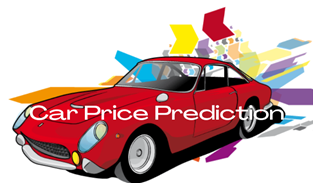

**By :** Praveen Choudhary

### **Project Description**
- Embark on the "Car Sales Price Prediction" project, where the focus is on leveraging a regression model. As a sales professional, the aim is to create a predictive model that estimates the amount consumers would spend on a car, considering key customer attributes such as name, email, country, gender, age, annual salary, credit card debt, and net worth. The project's primary task involves developing a robust regression model to anticipate the precise amount paid for a car. Join us in this venture to streamline sales predictions and empower decision-making through regression techniques.

### **Objective**
- Create a regression model for the "Car Sales Price Prediction" project, aiming to estimate consumer spending on cars. Utilizing key customer attributes like name, email, country, gender, age, annual salary, credit card debt, and net worth, the project focuses on developing a robust regression model. The primary goal is to accurately anticipate the exact amount paid for a car, streamlining sales predictions and enhancing decision-making for sales professionals in the automotive industry. Join us in revolutionizing car sales forecasting through the power of regression techniques.

In [46]:
#import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# support warning for clean notebook
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Reading the CSV file
data = pd.read_csv("D:\\car_purchasing.csv", encoding='latin-1')
data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### **Summary of data**

In [48]:
print('Number of columns in dataset : {}'.format(data.shape[0]))
print('Number of rows in dataset : {}'.format(data.shape[1]))
print('Size of the dataset : {}'.format(data.size))

Number of columns in dataset : 500
Number of rows in dataset : 9
Size of the dataset : 4500


In [49]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [51]:
# Duplicate items
data.duplicated().sum()

0

In [52]:
# Null Value
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [53]:
# Columns Total
data.count()

customer name          500
customer e-mail        500
country                500
gender                 500
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [54]:
data['gender'].value_counts()

gender
1    253
0    247
Name: count, dtype: int64

In [55]:
data['country'].value_counts().head(10)

country
Israel              6
Mauritania          6
Bolivia             6
Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Name: count, dtype: int64

data.head(2)

In [56]:
data.head(2)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566


#### **Descriptive Statistics**

In [57]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [58]:
# Normality Check
# Normality probability plots
from scipy import stats
import scipy as scipy
column=['age','annual Salary','credit card debt','net worth','car purchase amount']
for i in column:
    print('Shapiro test of',i,'is :',stats.shapiro(data['age']))

Shapiro test of age is : ShapiroResult(statistic=0.9978624582290649, pvalue=0.7860698699951172)
Shapiro test of annual Salary is : ShapiroResult(statistic=0.9978624582290649, pvalue=0.7860698699951172)
Shapiro test of credit card debt is : ShapiroResult(statistic=0.9978624582290649, pvalue=0.7860698699951172)
Shapiro test of net worth is : ShapiroResult(statistic=0.9978624582290649, pvalue=0.7860698699951172)
Shapiro test of car purchase amount is : ShapiroResult(statistic=0.9978624582290649, pvalue=0.7860698699951172)


- The p-values from the Shapiro-Wilk test for the numeric data are all greater than 0.05. 
- This suggests that there is no significant evidence to reject the null hypothesis, indicating that the data is likely normally distributed. 
- As a result, statistical analyses assuming normality can be applied with confidence.

#### **Data Visualization**

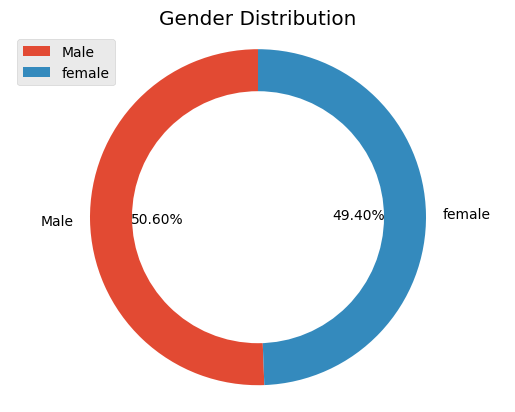

In [15]:
# Pie Char 
gender_counts = data['gender'].value_counts()
labels = gender_counts.index
plt.style.use('ggplot')
plt.pie(gender_counts, labels={'female','Male'}, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='upper left')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Gender Distribution')
plt.show()

- These pie charts indicate gender distribution. in which males are 50.60%, which is approximately 253, and females are 49.40%, which is approximately 247. Red indicates male, and blue indicates female.

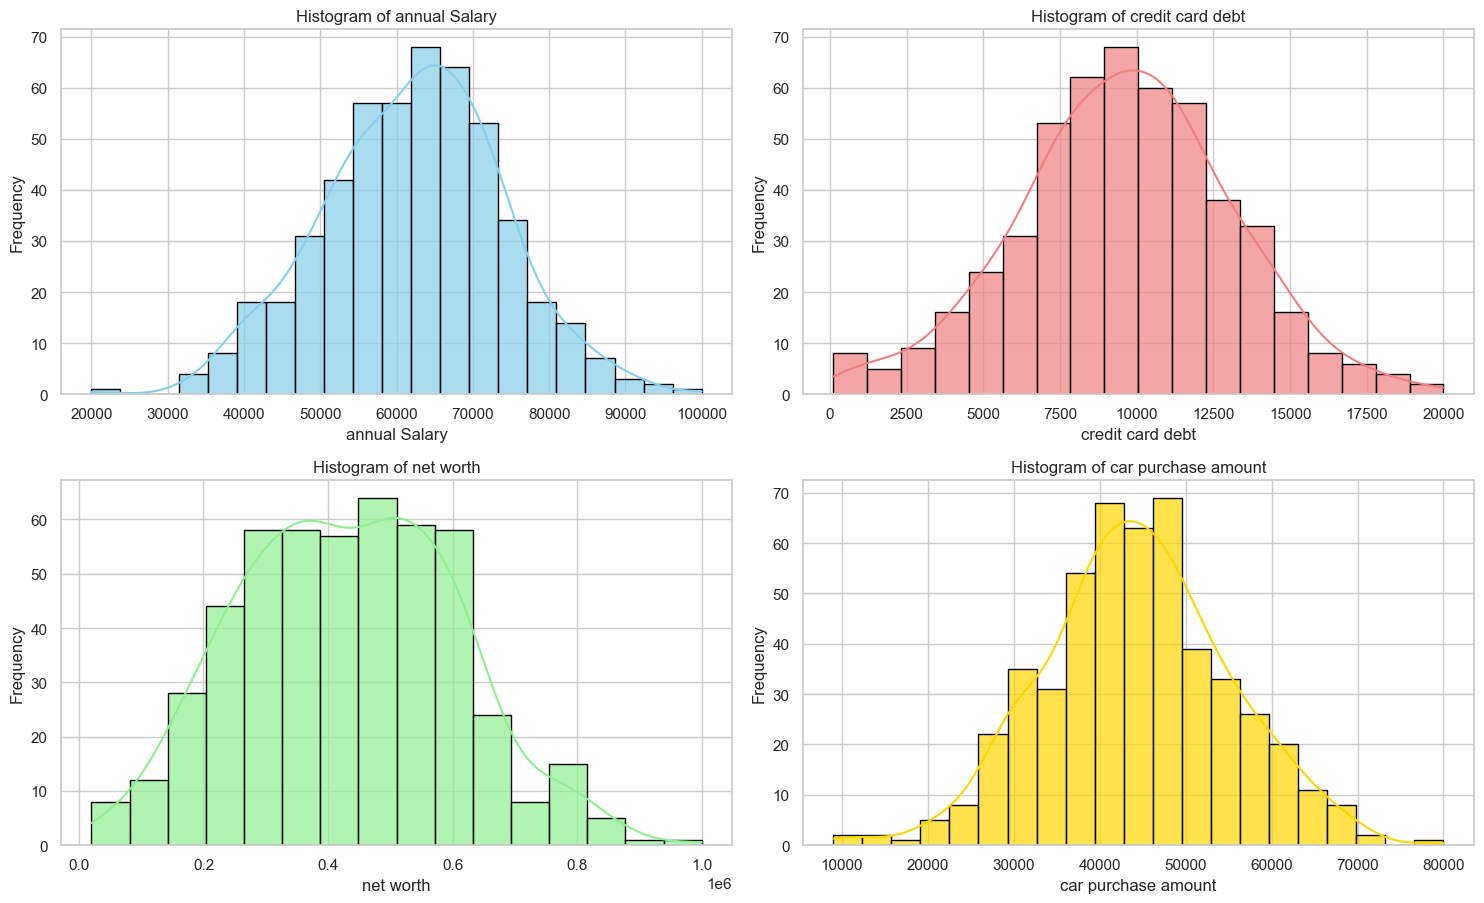

In [45]:
column=['annual Salary','credit card debt','net worth','car purchase amount']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, col in enumerate(column):
    row_num = i // 2
    col_num = i % 2
    
    sns.histplot(data[col], kde=True, color=colors[i], edgecolor='black', alpha=0.7, ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Histogram of {col}')
    axes[row_num, col_num].set_xlabel(col)
    axes[row_num, col_num].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

+ ***Histogram :-***
    - **Annual Salary:** In this histogram, the maximum person annual salary lies between $50,000 and $75,000.
    - **Creadit Card Debt:** In this histogram, the maximum person credit card expenditure range is 7500 to 15000.
    - **Net Worth:** This chart highlights that the highest persons net worth lies between 0.2 and 0.65.
    - **Car Purchase Amount:** This chart highlights that the highest person expends on a car lies between $30,000 and $60,000.

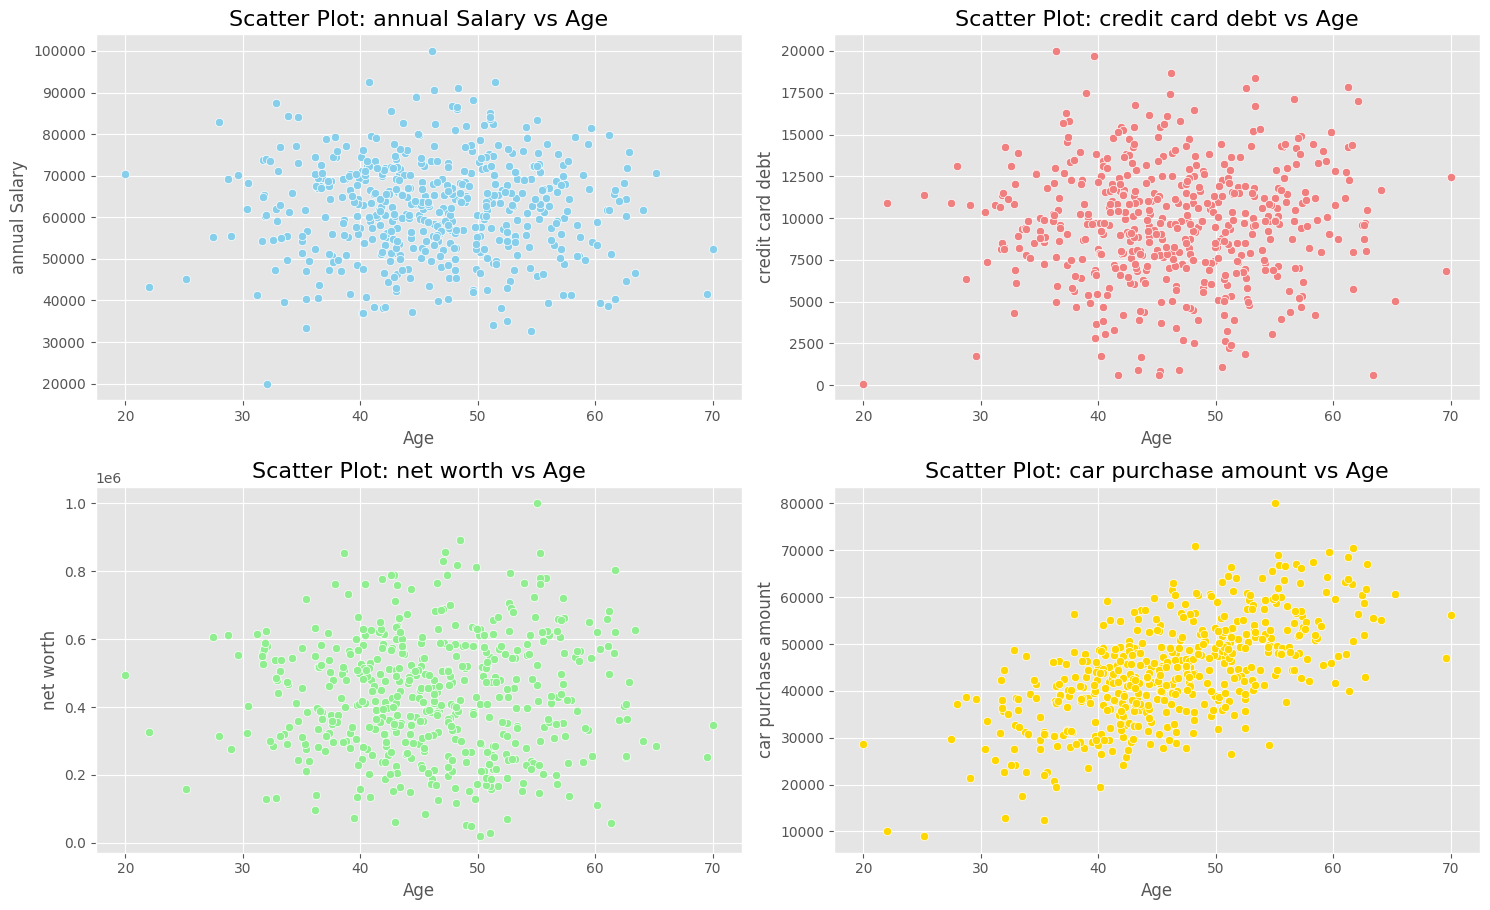

In [17]:
columns = ['annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

# Scatter plot for each column
for i, col in enumerate(columns):
    row_num = i // 2
    col_num = i % 2
    
    sns.scatterplot(x='age', y=col, data=data, color=colors[i], ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Scatter Plot: {col} vs Age',fontsize=16)
    axes[row_num, col_num].set_xlabel('Age')
    axes[row_num, col_num].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

+ ***Scatter Plot:***
    - **Annual Salary Vs Age:** The maximum age range falls between 40 to 60, where individuals tend to have higher annual salaries. The average annual salary is $60,000.

    - **Credit Card Debt Vs Age:** The age group with the highest frequency of credit card usage is between 35 to 60, indicating increased credit card debt within this range.

    - **Net Worth Vs Age:** Individuals with the highest net worth are typically in the age range of 40 to 60.

    - **Car Purchase Amount Vs Age:** It shows a linear pattern, with the maximum age falling between 40 to 50 for those who make car purchases.

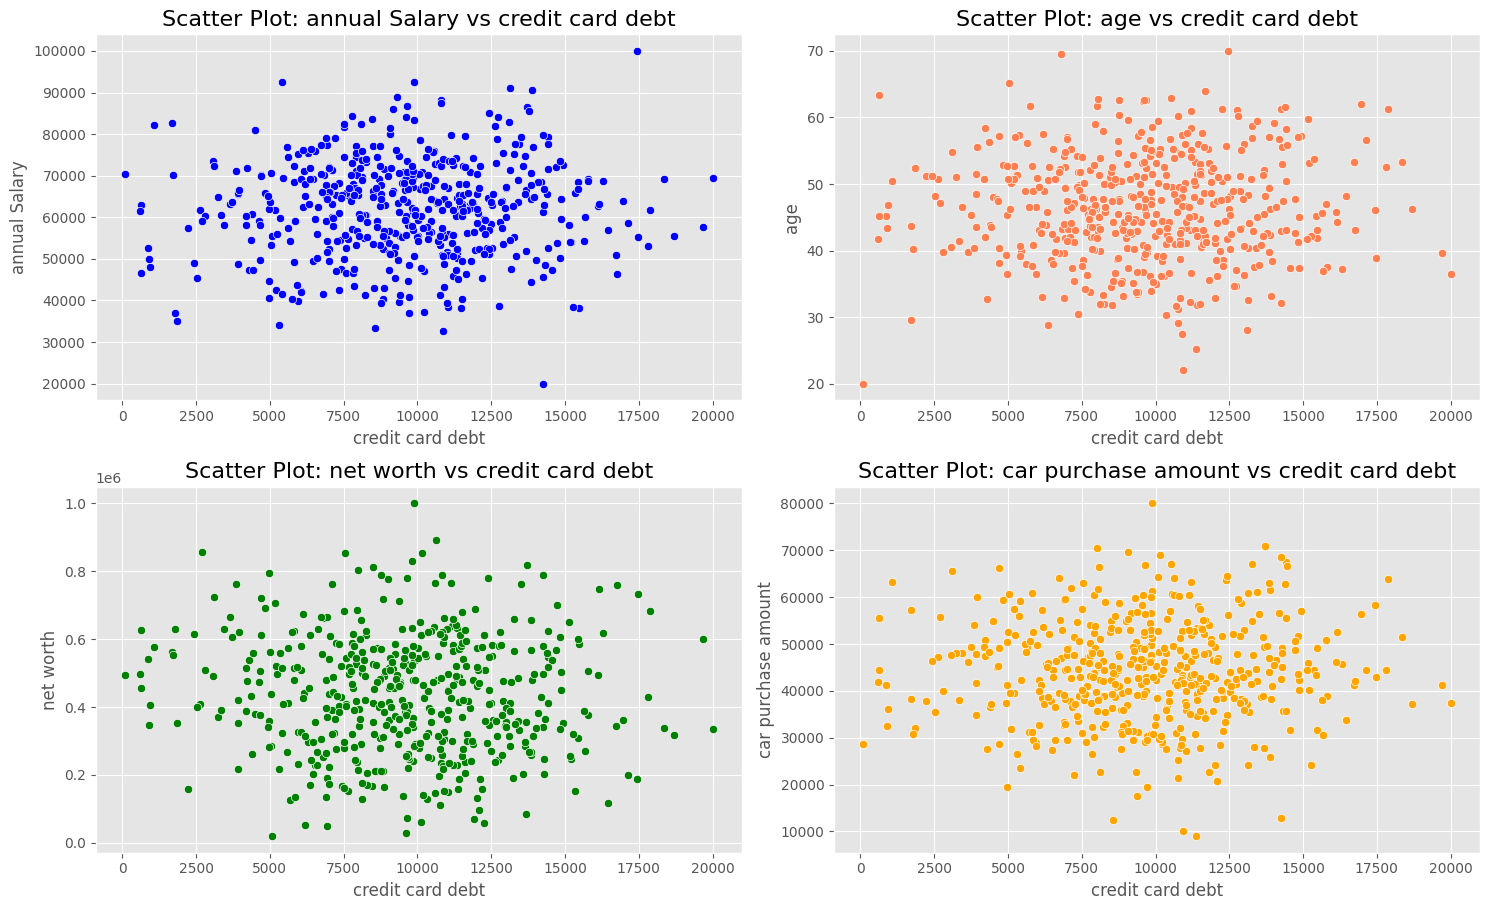

In [18]:
columns = ['annual Salary', 'age', 'net worth', 'car purchase amount']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['blue', 'coral', 'green', 'orange']

for i, col in enumerate(columns):
    row_num = i // 2
    col_num = i % 2
    
    sns.scatterplot(x='credit card debt', y=col, data=data, color=colors[i], ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Scatter Plot: {col} vs credit card debt',fontsize=16)
    axes[row_num, col_num].set_xlabel('credit card debt')
    axes[row_num, col_num].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


+ ***Scatter Plot***
    - **Annual Salary vs. Credit Card Debt:** The maximum credit card debt range falls between $7,500 and $12,500, where individuals tend to have higher annual salaries. The average annual salary is $60,000.

    - **Credit Card Debt vs. Age:** The age group with the highest frequency of credit card usage is between 35 and 60, indicating increased credit card debt within this range.

    - **Net Worth vs. Credit Card Debt:** Individuals with the highest net worth are typically in the credit card debt range of $5,000 to $15,000.

    - **Car Purchase Amount vs. Credit Card Debt:** The maximum car purchase amount falls between $30,000 and $60,000 for those who use credit card debt.

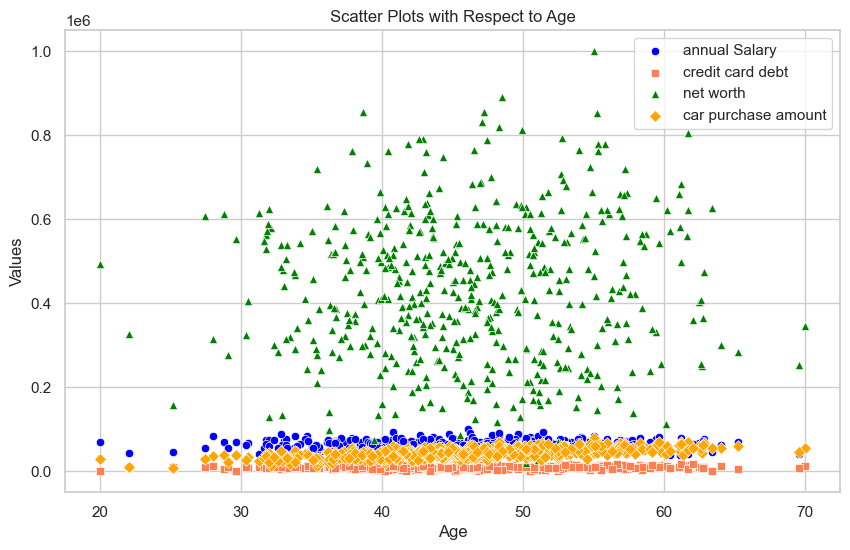

In [19]:
columns = ['annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

colors = ['blue', 'coral', 'green', 'orange']
markers = ['o', 's', '^', 'D']
labels = columns

# Create scatter plots for each column
for i, col in enumerate(columns):
    sns.scatterplot(x='age', y=col, data=data, color=colors[i], marker=markers[i], label=labels[i])

plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Scatter Plots with Respect to Age')
plt.legend()

plt.show()

- There is high variability in net worth data compared to other datasets.

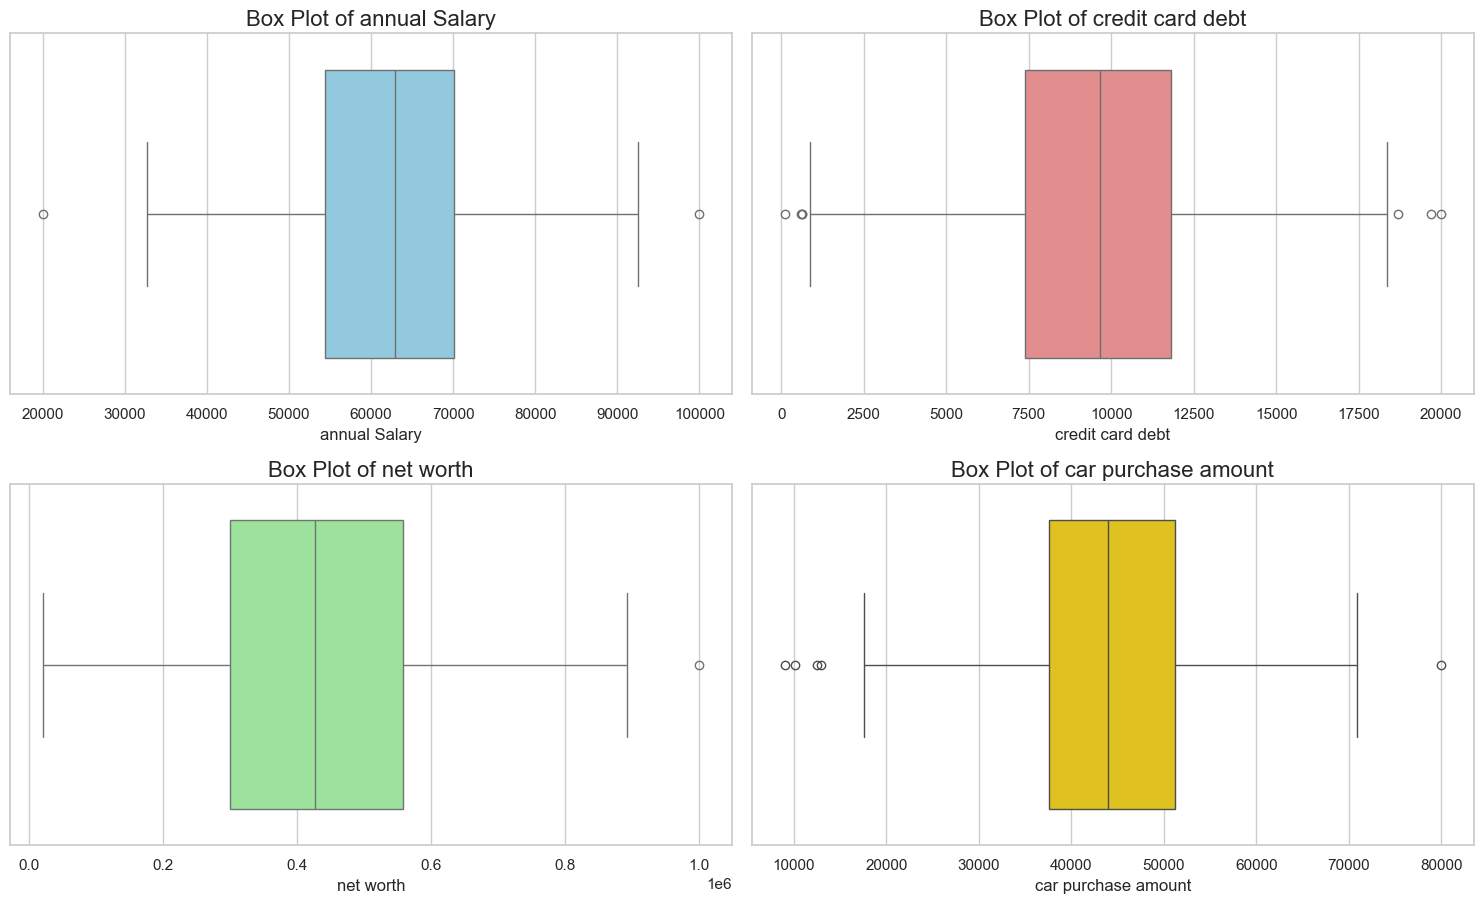

In [20]:
# Box plot for all numeric data
columns = ['annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[col], color=colors[i])
    plt.title(f'Box Plot of {col}',fontsize=16)
    plt.xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

+ ***Boxplot Analysis:***
    - **Annual Salary:** The chart reveals the presence of two outliers in the distribution of annual salaries.
    
    - **Credit Card Debt:** Five outliers stand out in the boxplot representing credit card debt.
    
    - **Net Worth:** A single outlier is observed in the boxplot illustrating net worth.
    
    - **Car Purchase Amount:** The boxplot for car purchase amount displays five outliers, indicating significant deviations from the norm.

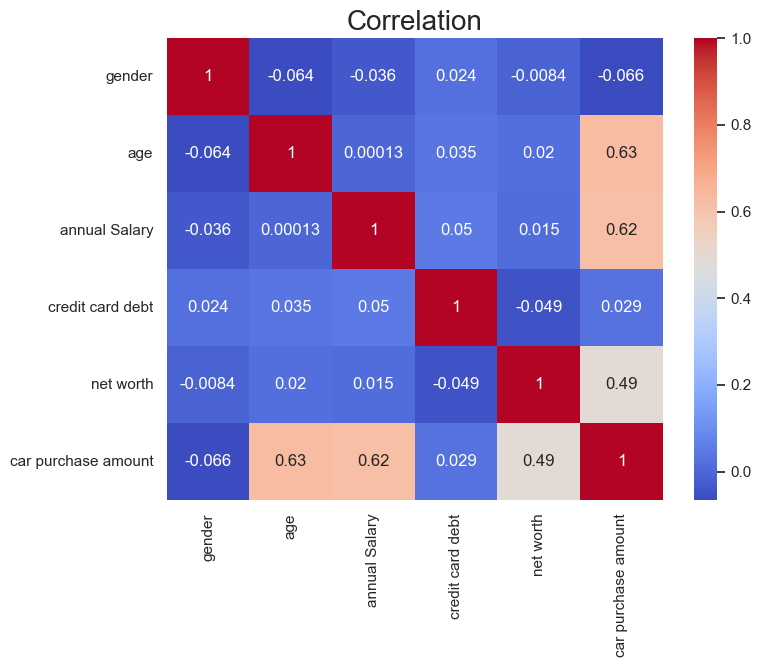

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation",fontsize=20)
plt.show()

- Age and car purchase amount show a strong correlation of approximately 0.63.
- Annual salary is closely correlated with car purchase amount, with a similar high correlation of 0.62.
- Net worth exhibits a moderate correlation of 0.49 with car purchase amount.
- Correlations between other factors demonstrate values below the normal range, hovering around 0.4.

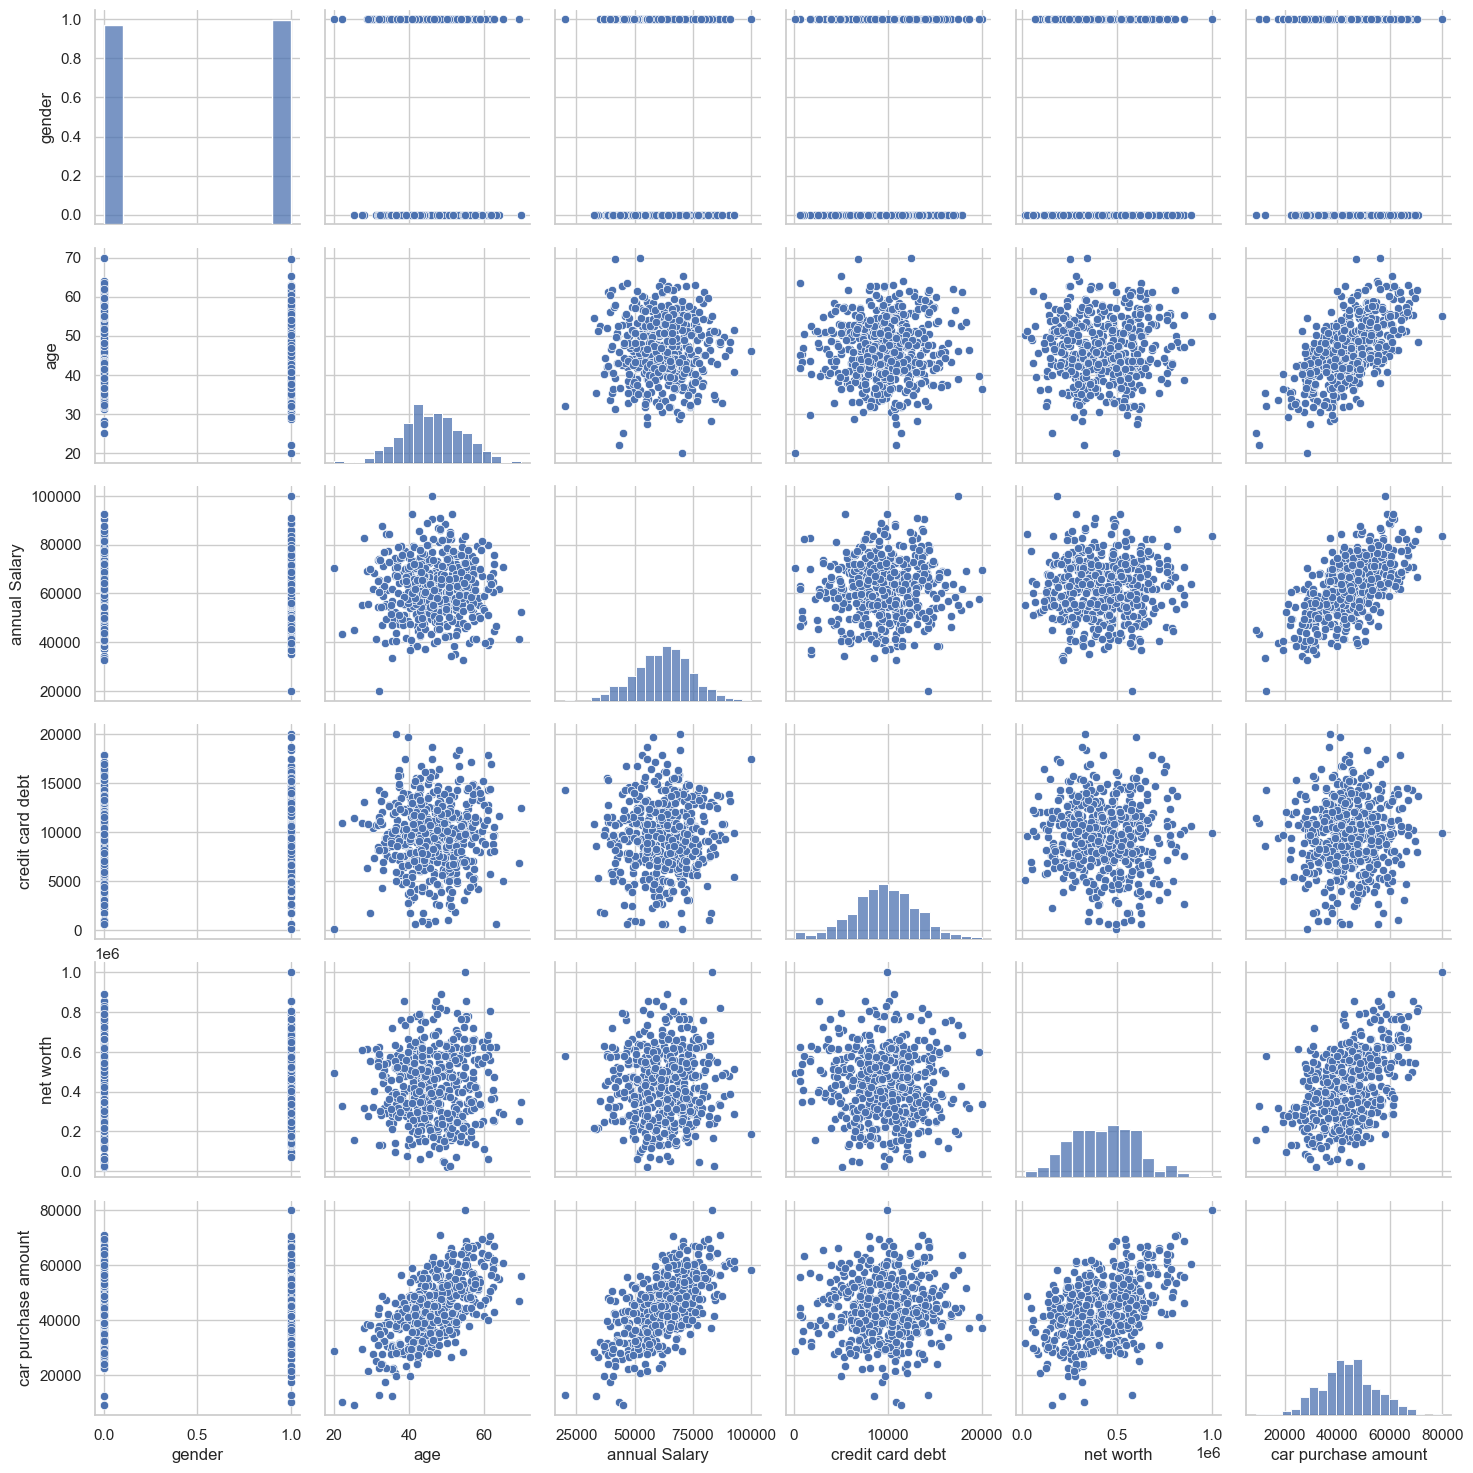

In [70]:
sns.pairplot(data)

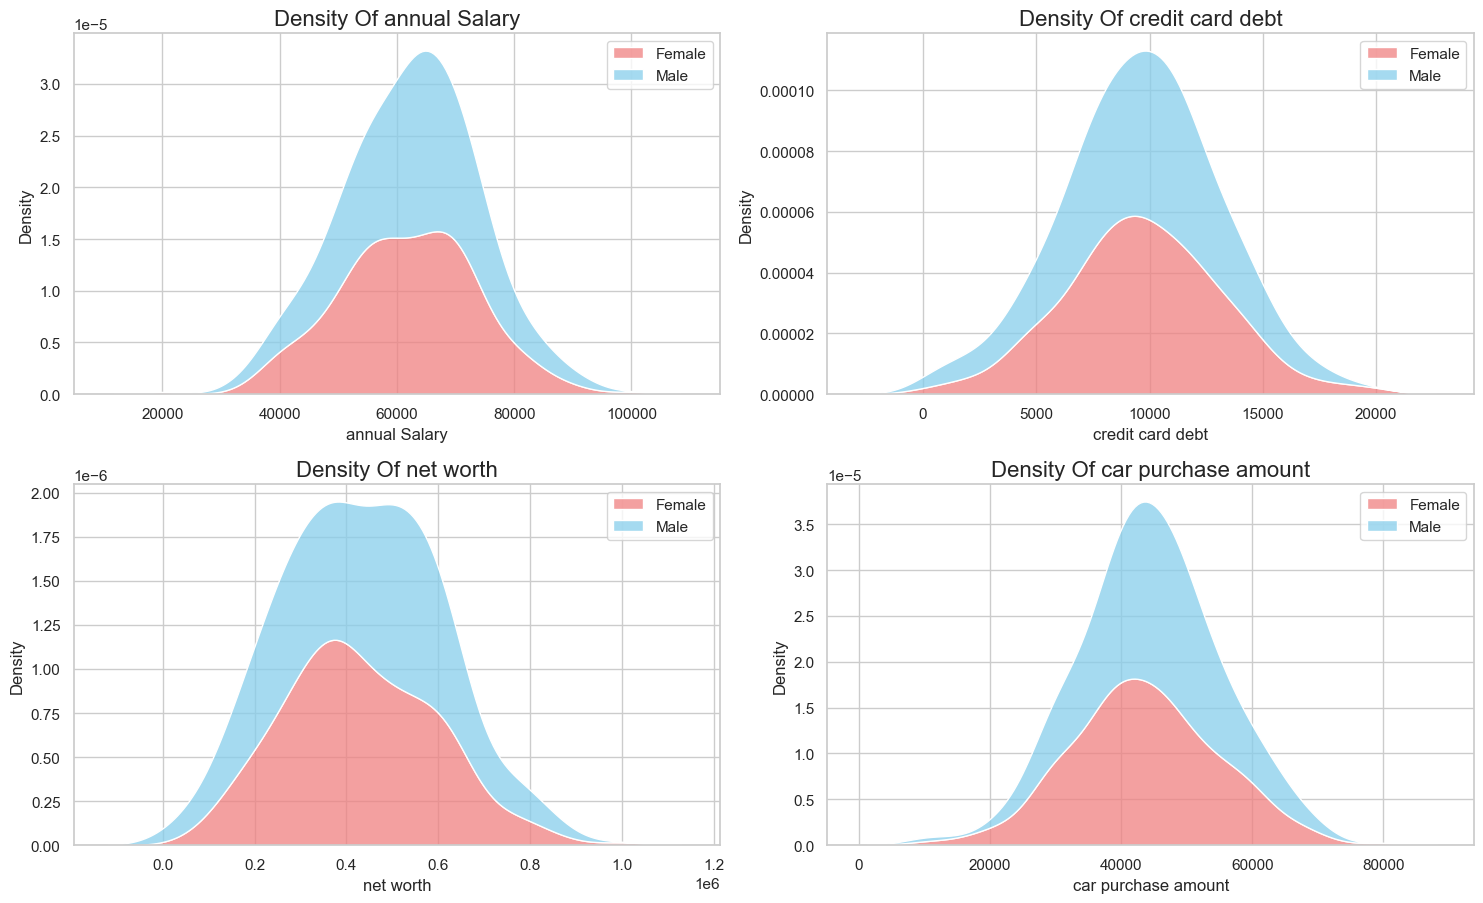

In [22]:
# Density Chart
plt.figure(figsize=(15, 10))

columns = ['annual Salary','credit card debt','net worth','car purchase amount']

for i, col in enumerate(columns, start=1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=data, x=col, hue="gender", palette={0: "skyblue", 1: 'lightcoral'}, multiple="stack")
    plt.title(f"Density Of {col}", fontsize=16)
    plt.legend(labels=['Female', 'Male'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- **Salary:** Females cluster around lower salaries than males, with more density in the $40-60k range.
- **Debt:** Males carry more credit card debt, with a higher density around $5k compared to females.
- **Net Worth:** Females more likely to have low net worth (around $0), while males' density peaks higher.
- **Car Buys:** Males dominate car purchases over $10k, with higher density than females at those price points.

#### **Descriptive Analysis**

In [23]:
data.describe(include='O')

,customer name,customer e-mail,country
count,500,500,500
unique,498,500,211
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel
freq,2,1,6


In [24]:
data.groupby('gender')[['annual Salary','credit card debt','net worth','car purchase amount']].mean()

,annual Salary,credit card debt,net worth,car purchase amount
gender,,,,
0,62559.128313,9522.298721,432948.721130,44933.131928
1,61705.593322,9690.967353,430037.639104,43503.620644


#### **Convert Categorical to Numerical Data and Drop Unnecessary Columns**
- All numeric data in the dataset are within normal ranges, and there are no missing values. Therefore, the only task is to eliminate unnecessary categorical data that is not needed for our analysis. We will proceed by dropping these irrelevant categorical variables from our dataset.

In [25]:
data.head(4)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313


In [26]:
df=data.drop(['customer name','customer e-mail','country'],axis=1)

In [27]:
df.head(5)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


#### **Training and Testing Sets for Machine Learning**

In [59]:
y=df[['car purchase amount']] # Depended
X=df[['gender','age','annual Salary','credit card debt','net worth']]  # Independent

In [29]:
X.head(2)

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078


In [30]:
y.head(2)

,car purchase amount
0,35321.45877
1,45115.52566


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [32]:
len(x_train)

400

In [33]:
len(x_test)

100

#### **Model Execution**

**LinearRegression :** 
- Linear regression is a statistical technique for modeling the relationship between a dependent variable and one or more independent variables. It aims to find a linear equation that best fits the observed data.

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [35]:
model.score(x_test,y_test)

0.9999999859811516

In [36]:
from sklearn.metrics import mean_squared_error
# Predict on the test set
y_predicted = model.predict(x_test)

# Evaluate the model
training_score = model.score(x_train, y_train) * 100
testing_score = model.score(x_test, y_test) * 100

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print("Training dataset Score : ", training_score, '%')
print("Testing dataset Score : ", testing_score, '%')
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Training dataset Score :  99.9999979654546 %
Testing dataset Score :  99.99999859811516 %
Mean Squared Error (MSE):  1.9654975681017794
Root Mean Squared Error (RMSE):  1.4019620423184713


- In this linear regression model, the testing score is approximately 99.99%, indicating potential overfitting. To ensure a robust model, we will explore additional regression models to find the best fit for our data.

**RamdomForestRegression :** 
- Random Forest Regression is a machine learning algorithm that utilizes an ensemble of decision trees to make predictions. It excels in capturing complex relationships within data, providing improved accuracy compared to individual trees. This method is particularly effective for handling non-linear patterns and is widely used for regression tasks in predictive modeling.


In [60]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=120)
random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=120)

In [61]:
random_f_pred = random_forest.predict(x_test)

In [62]:
random_forest.score(x_test,y_test)

0.9428363434912982

In [63]:
from sklearn.metrics import mean_squared_error
y_predicted = random_forest.predict(x_test)

print("Training dataset Score : ",random_forest.score(x_train,y_train)*100,'%')
print("Testing dataset Score : ",random_forest.score(x_test,y_test)*100,'%')

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)


Training dataset Score :  99.07787339813808 %
Testing dataset Score :  94.28363434912981 %
Mean Squared Error (MSE):  8014569.025262436
Root Mean Squared Error (RMSE):  2831.0014173896902


**DecisionTreeRegressor**
- It builds a tree structure by recursively partitioning the dataset based on features, aiming to predict the target variable's value. This algorithm is versatile and can capture complex relationships in data, making it valuable for various regression scenarios.

In [64]:
from sklearn.tree import DecisionTreeRegressor
ds_tree=DecisionTreeRegressor()
ds_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
y_predicted = ds_tree.predict(x_test)

# Evaluate the model
training_score = ds_tree.score(x_train, y_train) * 100
testing_score = ds_tree.score(x_test, y_test) * 100

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print("Training dataset Score : ", training_score, '%')
print("Testing dataset Score : ", testing_score, '%')
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Training dataset Score :  100.0 %
Testing dataset Score :  87.19854045633126 %
Mean Squared Error (MSE):  17948148.77197709
Root Mean Squared Error (RMSE):  4236.525554269334


**GradientBoostingRegressor**
- It focuses on correcting errors of the previous trees, leading to a highly accurate predictive model. Known for its versatility and effectiveness, GradientBoostingRegressor is particularly useful for complex regression tasks and tends to perform well in various scenarios.

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gr_boost=GradientBoostingRegressor()
gr_boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [67]:
y_predicted = gr_boost.predict(x_test)

# Evaluate the model
training_score = gr_boost.score(x_train, y_train) * 100
testing_score = gr_boost.score(x_test, y_test) * 100

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print("Training dataset Score : ", training_score, '%')
print("Testing dataset Score : ", testing_score, '%')
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Training dataset Score :  99.6328174408853 %
Testing dataset Score :  97.30166796870333 %
Mean Squared Error (MSE):  3783167.424675104
Root Mean Squared Error (RMSE):  1945.0366126824206


#### **Conclusion**
- In conclusion, the "Car Sales Price Prediction" project has encountered a pivotal challenge with the Linear Regression model exhibiting overfitting, resulting in an exaggerated accuracy score of 99.99%. To rectify this issue, a transition to the GradientBoostingRegressor model was essential, given its remarkable performance in minimizing the Root Mean Squared Error (RMSE) to 1945.9100. Noteworthy is the model's consistent and robust testing score of approximately 97.30%, affirming its superiority among alternative regression techniques. This strategic shift ensures a more reliable and accurate prediction of car sales prices, contributing to enhanced decision-making and improved sales forecasting in the automotive domain.

### ***Thank You***